In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
normalized_data = pd.read_csv(r'D:\DWDM DSN\Dataset_without_class_balancing.csv')

# Splitting the data into features (X) and target (y)
X = normalized_data.drop(columns=['Diagnosis'])
y = normalized_data['Diagnosis']

# Splitting the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9235294117647059
F1 Score (Weighted): 0.9023642109148774
Precision (Weighted): 0.8969739229998569
Recall (Weighted): 0.9235294117647059
Cross-validation Accuracy (5-fold): 0.9220477649603461

Confusion Matrix:
[[ 100    0    0    0    0    0    0    0    0    0    0    0   73]
 [   0    1    0    0    0    0    0    0    0    0    0    0    3]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0   11    0    0    0    0  143]
 [   4    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    7]
 [   0    0    0    0    0    0    0    1    0    0    0    0   13]
 [   0    0    0    0    0    

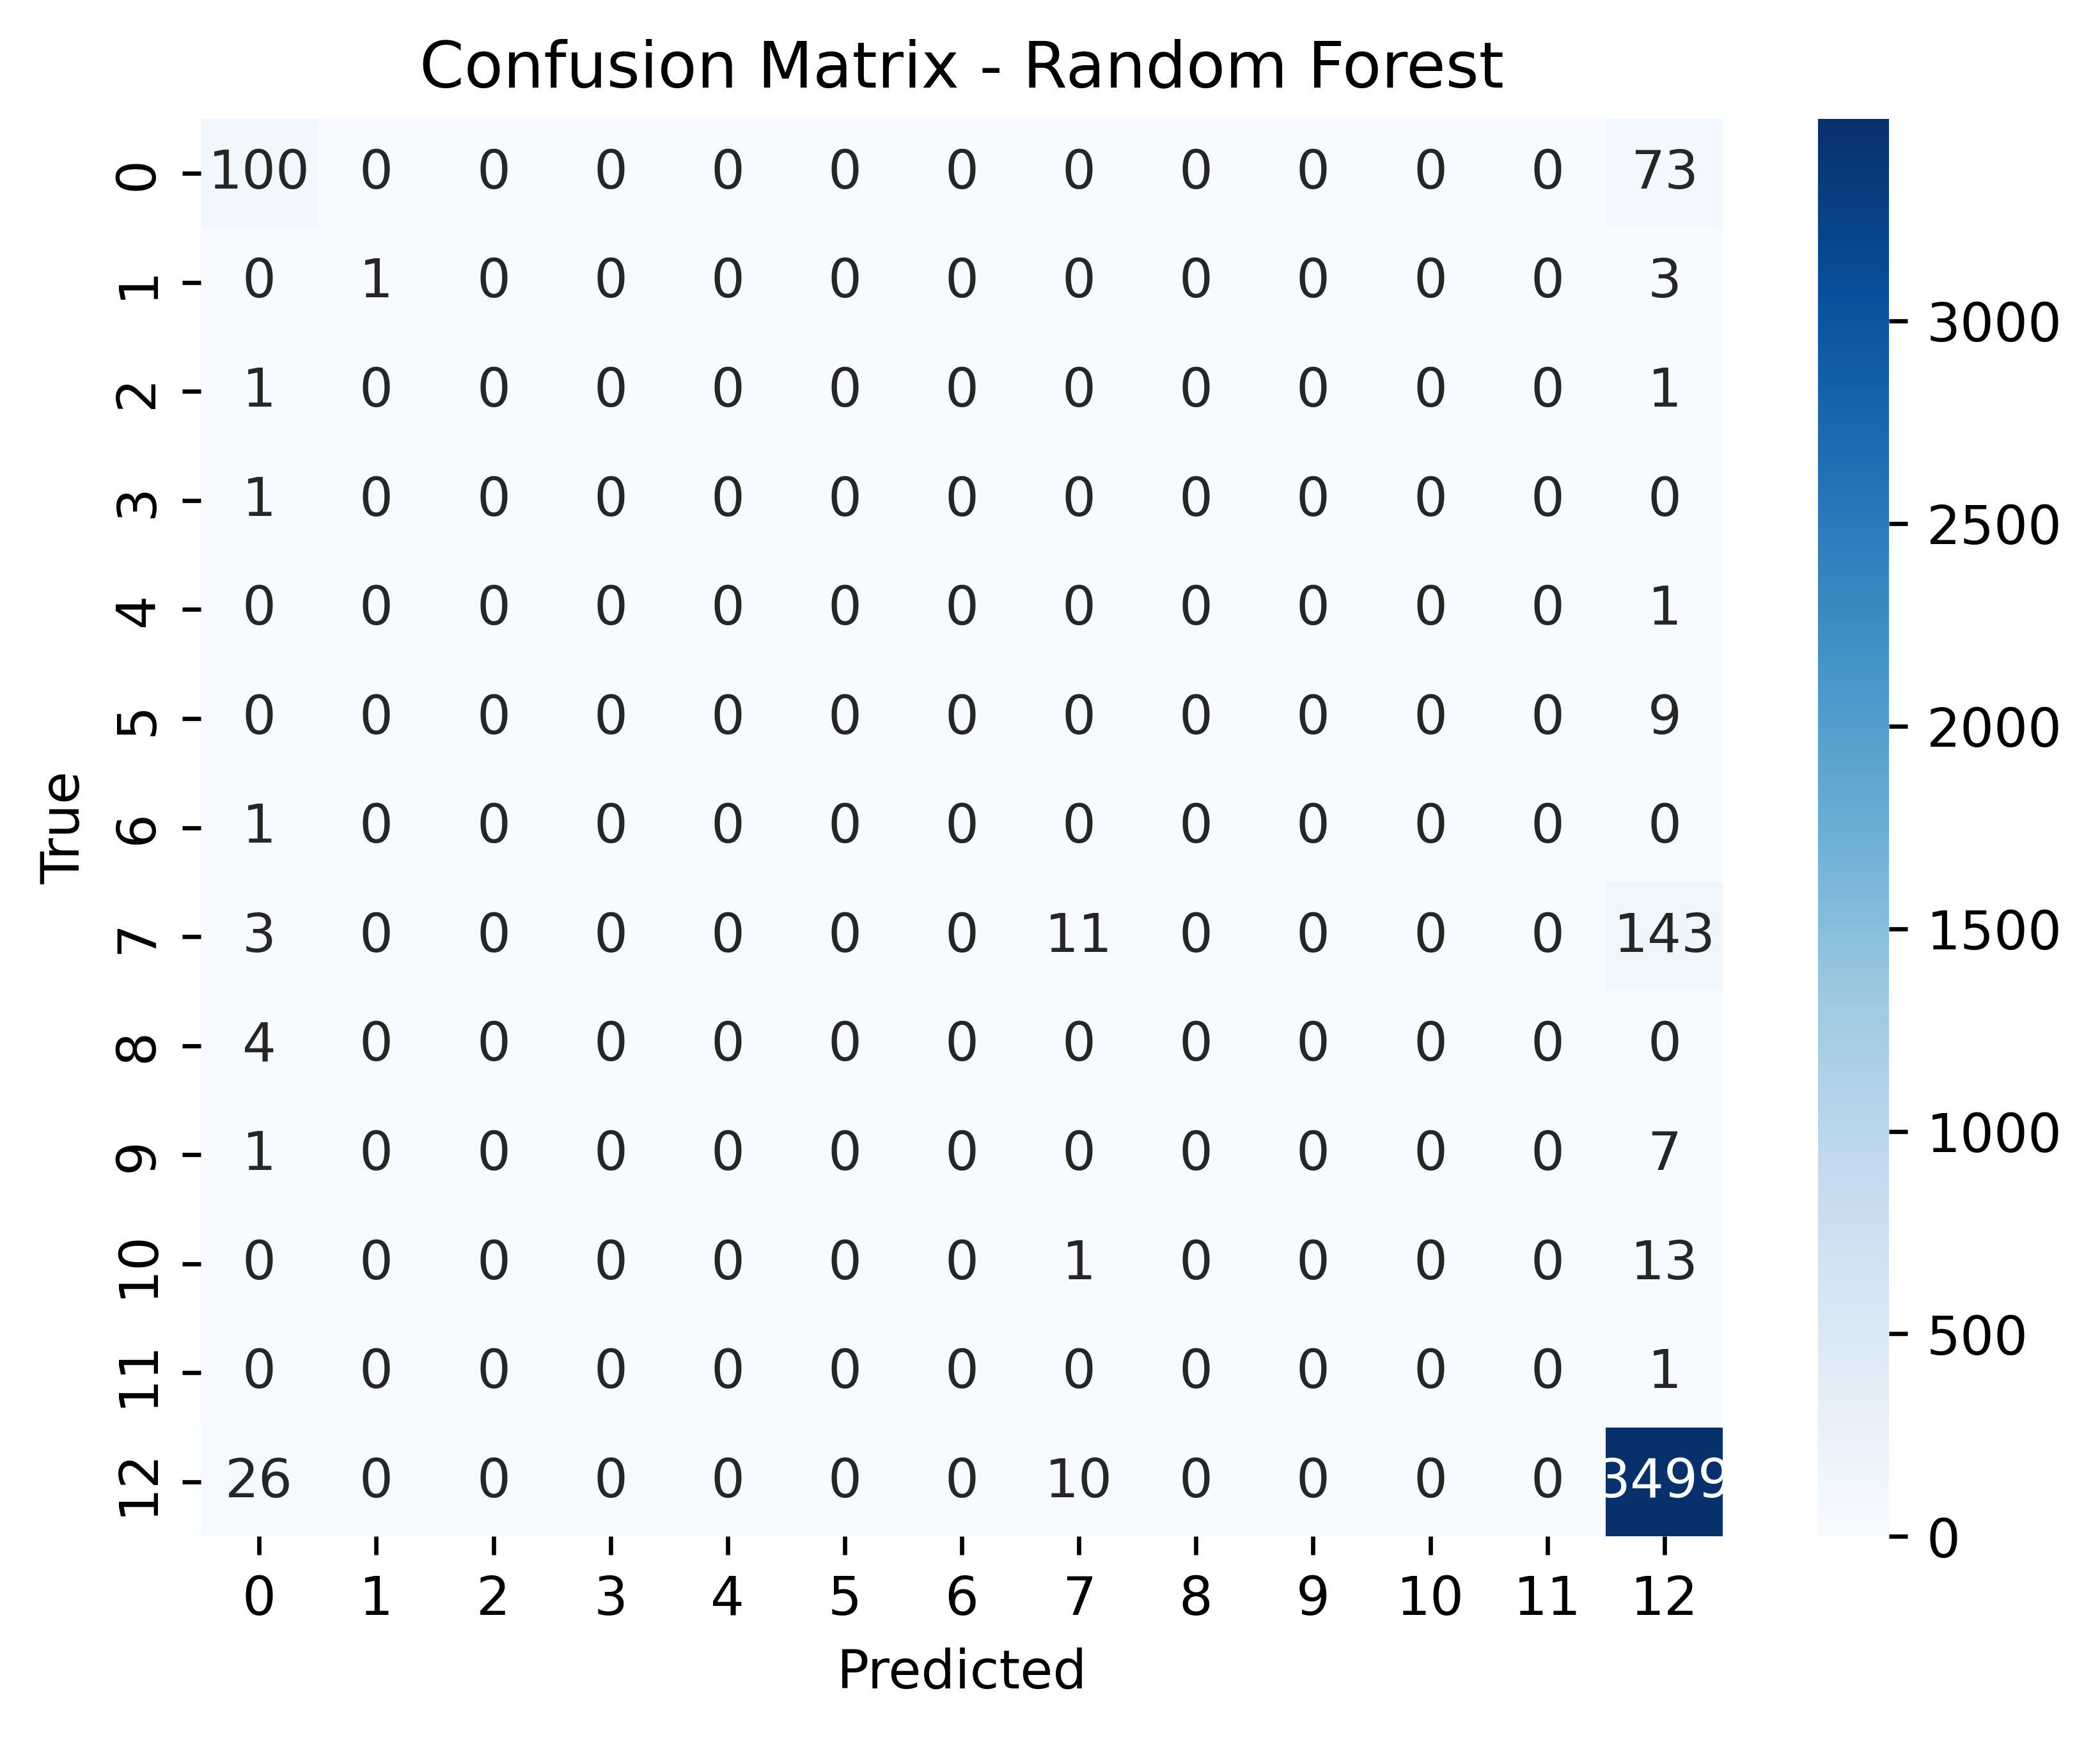

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Cross-validation score
cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("F1 Score (Weighted):", f1)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("Cross-validation Accuracy (5-fold):", cv_score.mean())
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, plot the confusion matrix
plt.figure(dpi=600)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("confusion_matrix_rf_600dpi.png", dpi=600, bbox_inches="tight")
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy (Gradient Boosting): 0.9189258312020461
F1 Score (Weighted): 0.902873355910486
Precision (Weighted): 0.90050849766653
Recall (Weighted): 0.9189258312020461
Cross-validation Accuracy (5-fold): 0.9188683008892093

Confusion Matrix (Gradient Boosting):
[[ 104    2    1    0    0    0    0    3    2    0    0    0   61]
 [   0    2    0    0    0    0    0    0    0    0    0    0    2]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    1    0    0    0    1    0   14    1    0    0    0  135]
 [   1    0    0    0    0    0    0    0    2    0    0    0    1]
 [   1    1    0    0    0    0    0    0    1    0    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0

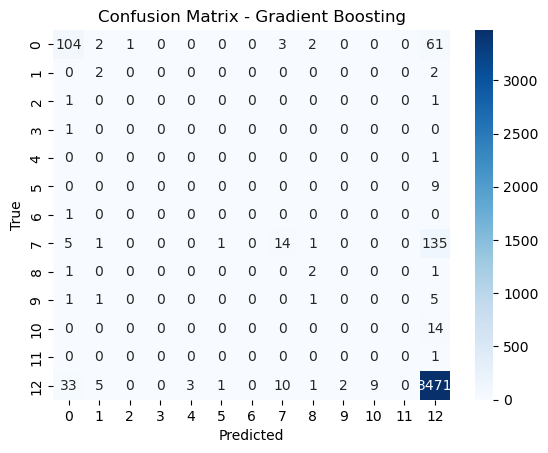

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')

# Cross-validation score
cv_score_gbc = cross_val_score(gbc_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display results
print("Accuracy (Gradient Boosting):", accuracy_gbc)
print("F1 Score (Weighted):", f1_gbc)
print("Precision (Weighted):", precision_gbc)
print("Recall (Weighted):", recall_gbc)
print("Cross-validation Accuracy (5-fold):", cv_score_gbc.mean())
print("\nConfusion Matrix (Gradient Boosting):")
print(conf_matrix_gbc)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


SVM Model Performance:
Accuracy: 0.9209718670076726
F1 Score (Weighted): 0.8935409533972175
Precision (Weighted): 0.870410421010463
Recall (Weighted): 0.9209718670076726
Cross-validation Accuracy (5-fold): 0.9210610430185051

Confusion Matrix (SVM):
[[  86    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0  154]
 [   2    0    0    0    0    0    0    0    0    0    0    0    2]
 [   2    0    0    0    0    0    0    0    0    0    0    0    6]
 [   0    0    0    0    0    0    0    0    0    0    0    0   14]
 [

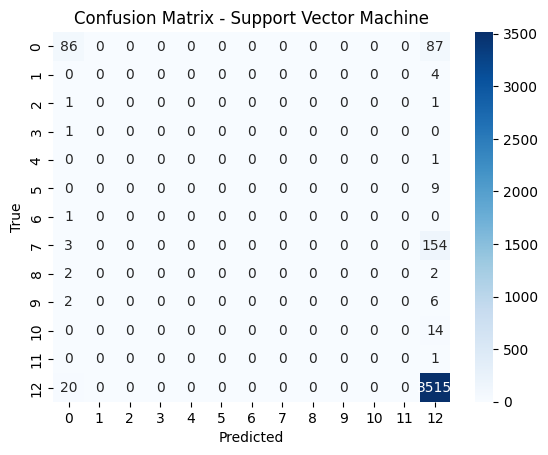

In [2]:
from sklearn.svm import SVC  # Import the Support Vector Classifier (SVC)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming X and y are already defined (X is the features matrix, y is the target variable)

# Step 1: Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Cross-validation score (5-fold cross-validation)
cv_score_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Step 5: Display Results
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"F1 Score (Weighted): {f1_svm}")
print(f"Precision (Weighted): {precision_svm}")
print(f"Recall (Weighted): {recall_svm}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_svm.mean()}")

# Step 6: Display Confusion Matrix
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model Performance:
Accuracy: 0.9166240409207161
F1 Score (Weighted): 0.9004067292248097
Precision (Weighted): 0.8892802077864388
Recall (Weighted): 0.9166240409207161
Cross-validation Accuracy (5-fold): 0.9114133020908435

Confusion Matrix (KNN):
[[ 104    0    0    0    0    0    0    3    1    0    0    0   65]
 [   0    0    0    0    0    0    0    0    0    2    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0   15    0    0    0    0  139]
 [   3    0    0    0    0    0    0    0    0    0    0    0    1]
 [   2    0    0    0    0    0    0    0    0    3    0    0    3]
 [   1    0    0    0    0    0    0    0    0    0    0    0   13]
 

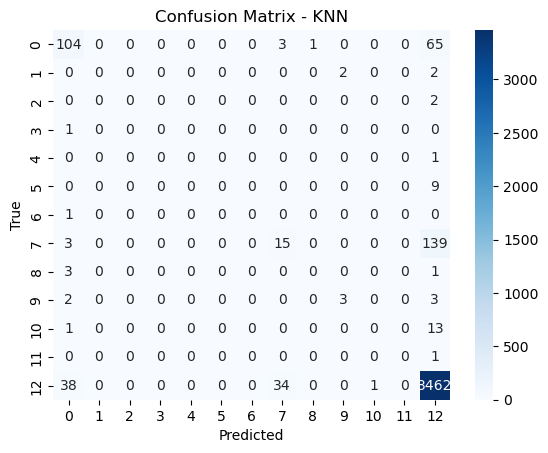

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Step 2: Train the model on the training set
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Step 7: Display results
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_knn:}")
print(f"F1 Score (Weighted): {f1_knn:}")
print(f"Precision (Weighted): {precision_knn:}")
print(f"Recall (Weighted): {recall_knn:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_knn.mean():}")

# Step 8: Confusion Matrix for the KNN model
print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Model Performance:
Accuracy: 0.8846547314578005
F1 Score (Weighted): 0.8858476843288231
Precision (Weighted): 0.8872930605186279
Recall (Weighted): 0.8846547314578005
Cross-validation Accuracy (5-fold): 0.8773153689017062

Confusion Matrix (Decision Tree):
[[  93    0    0    0    0    0    0   18    1    0    0    0   61]
 [   0    1    0    0    0    0    0    0    0    0    0    0    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    1    0    7]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   8    0    1    0    0    0    0   42    0    0    2    0  104]
 [   3    0    0    0    0    0    0    0    1    0    0    0    0]
 [   4    0    0    0    0    0    0    0    1    0    0    0    3]
 [   1    0    0    0    0    0    0    1    0   

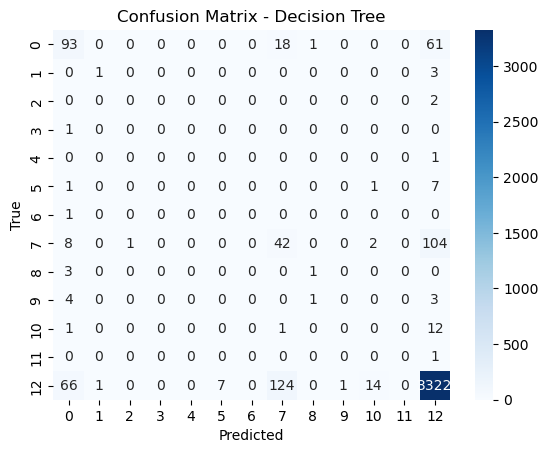

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Step 7: Display results
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:}")
print(f"F1 Score (Weighted): {f1_dt:}")
print(f"Precision (Weighted): {precision_dt:}")
print(f"Recall (Weighted): {recall_dt:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_dt.mean():}")

# Step 8: Confusion Matrix for Decision Tree model
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [14]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.0 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1159
[LightGBM] [Info] Number of data points in the train set: 9121, number of used features: 8
[LightGBM] [Info] Start training from score -3.154755
[LightGBM] [Info] Start training from score -6.921110
[LightGBM] [Info] Start training from score -7.732040
[LightGBM] [Info] Start training from score -9.118335
[LightGBM] [Info] Start training from score -6.345746
[LightGBM] [Info] Start training from score -3.154755
[LightGBM] [Info] Start training from score -6.345746
[LightGBM] [Info] Start training from score -6.720439
[LightGBM] [Info] Start training from score -5.507417
[LightGBM] [Info] Start training from score -9.118335
[LightGBM] [Info] Start training from score -0.100609
[LightGBM] [Warning] No further splits 

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 7296, number of used features: 8
[LightGBM] [Info] Start training from score -3.155289
[LightGBM] [Info] Start training from score -6.949171
[LightGBM] [Info] Start training from score -7.796469
[LightGBM] [Info] Start training from score -8.895082
[LightGBM] [Info] Start training from score -6.330132
[LightGBM] [Info] Start training from score -3.155289
[LightGBM] [Info] Start training from score -6.330132
[LightGBM] [Info] Start training from score -6.697857
[LightGBM] [Info] Start training from score -5.493884
[LightGBM] [Info] Start training from score -0.100560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

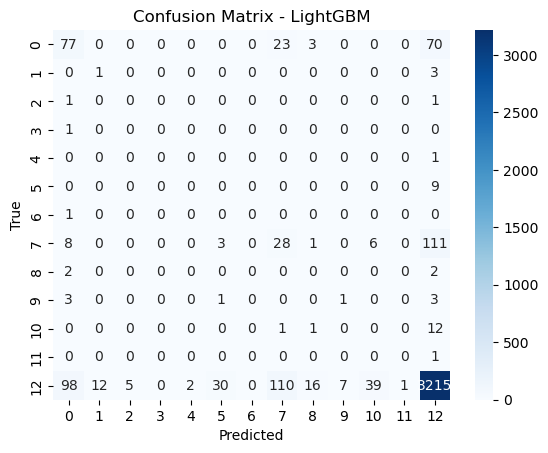

In [3]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
 
# Step 1: Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
 
# Step 2: Train the model on the training set
lgb_model.fit(X_train, y_train)
 
# Step 3: Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)
 
# Step 4: Evaluate the model's performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
 
# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
 
# Step 6: Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
 
# Step 7: Display results
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgb:}")
print(f"F1 Score (Weighted): {f1_lgb:}")
print(f"Precision (Weighted): {precision_lgb:}")
print(f"Recall (Weighted): {recall_lgb:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lgb.mean():}")
 
# Step 8: Confusion Matrix for LightGBM model
print("\nConfusion Matrix (LightGBM):")
print(conf_matrix_lgb)
 
# Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LightGBM')
plt.show()


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Voting Classifier Model Performance:
Accuracy: 0.921227621483376
F1 Score (Weighted): 0.8942404426922077
Precision (Weighted): 0.8709559642112682
Recall (Weighted): 0.921227621483376
Cross-validation Accuracy (5-fold): 0.9208418048546022

Confusion Matrix (Voting Classifier):
[[  89    0    0    0    0    0    0    0    0    0    0    0   84]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0    0    0    0    0  153]
 [   3    0    0    0    0    0    0    0    0    0    0    0    1]
 [   2    0    0    0    0    0    0    0    0    0    0    0    6]
 [   0    0    0    0    0    0    0    0  

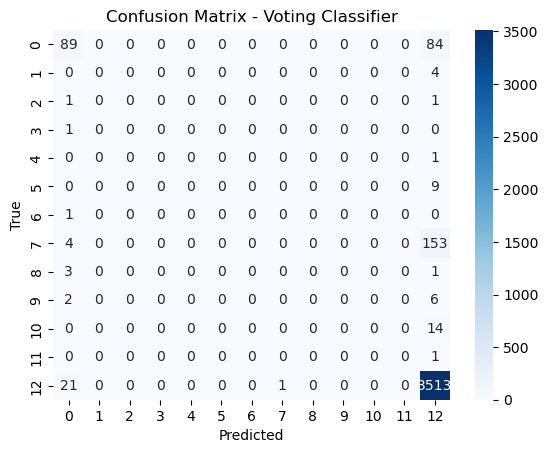

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize individual base models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Create a Voting Classifier with the base models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_model),
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')  # 'hard' voting means the final prediction is the class with the majority vote

# Step 3: Train the Voting Classifier on the training set
voting_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score_voting = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Step 8: Display results
print("Voting Classifier Model Performance:")
print(f"Accuracy: {accuracy_voting:}")
print(f"F1 Score (Weighted): {f1_voting:}")
print(f"Precision (Weighted): {precision_voting:}")
print(f"Recall (Weighted): {recall_voting:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_voting.mean():}")

# Step 9: Confusion Matrix for Voting Classifier model
print("\nConfusion Matrix (Voting Classifier):")
print(conf_matrix_voting)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


MLP Classifier (Neural Network) Model Performance:
Accuracy: 0.9217391304347826
F1 Score (Weighted): 0.9007390668836992
Precision (Weighted): 0.8932112134702191
Recall (Weighted): 0.9217391304347826
Cross-validation Accuracy (5-fold): 0.9202933189137227

Confusion Matrix (MLP Classifier):
[[ 109    0    0    0    0    0    0    3    0    0    0    0   61]
 [   0    0    0    0    0    0    0    0    0    1    0    0    3]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    7    0    0    0    0  145]
 [   3    0    0    0    0    0    0    0    0    0    0    0    1]
 [   3    0    0    0    0    0    0    0    0    2    0    0    3]
 [   0    0    0    0    0    

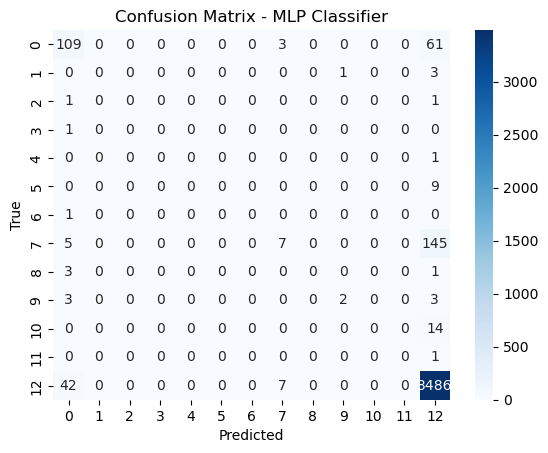

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the MLP Classifier (Neural Network)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Step 2: Train the model on the training set
mlp_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Step 7: Display results
print("MLP Classifier (Neural Network) Model Performance:")
print(f"Accuracy: {accuracy_mlp:}")
print(f"F1 Score (Weighted): {f1_mlp:}")
print(f"Precision (Weighted): {precision_mlp:}")
print(f"Recall (Weighted): {recall_mlp:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_mlp.mean():}")

# Step 8: Confusion Matrix for MLP model
print("\nConfusion Matrix (MLP Classifier):")
print(conf_matrix_mlp)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()

In [19]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
normalized_data_2 = pd.read_csv(r'D:\DWDM DSN\Dataset_with_class_balancing.csv')

# Splitting the data into features (X) and target (y)
X = normalized_data_2.drop(columns=['Diagnosis'])
y = normalized_data_2 ['Diagnosis']

# Splitting the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.9974322148235192
F1 Score (Weighted): 0.9974229588498436
Precision (Weighted): 0.997482862253384
Recall (Weighted): 0.9974322148235192
Cross-validation Accuracy (5-fold): 0.9973793425040803

Confusion Matrix:
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564    0    0]
 [   0    0    0    0    0    0

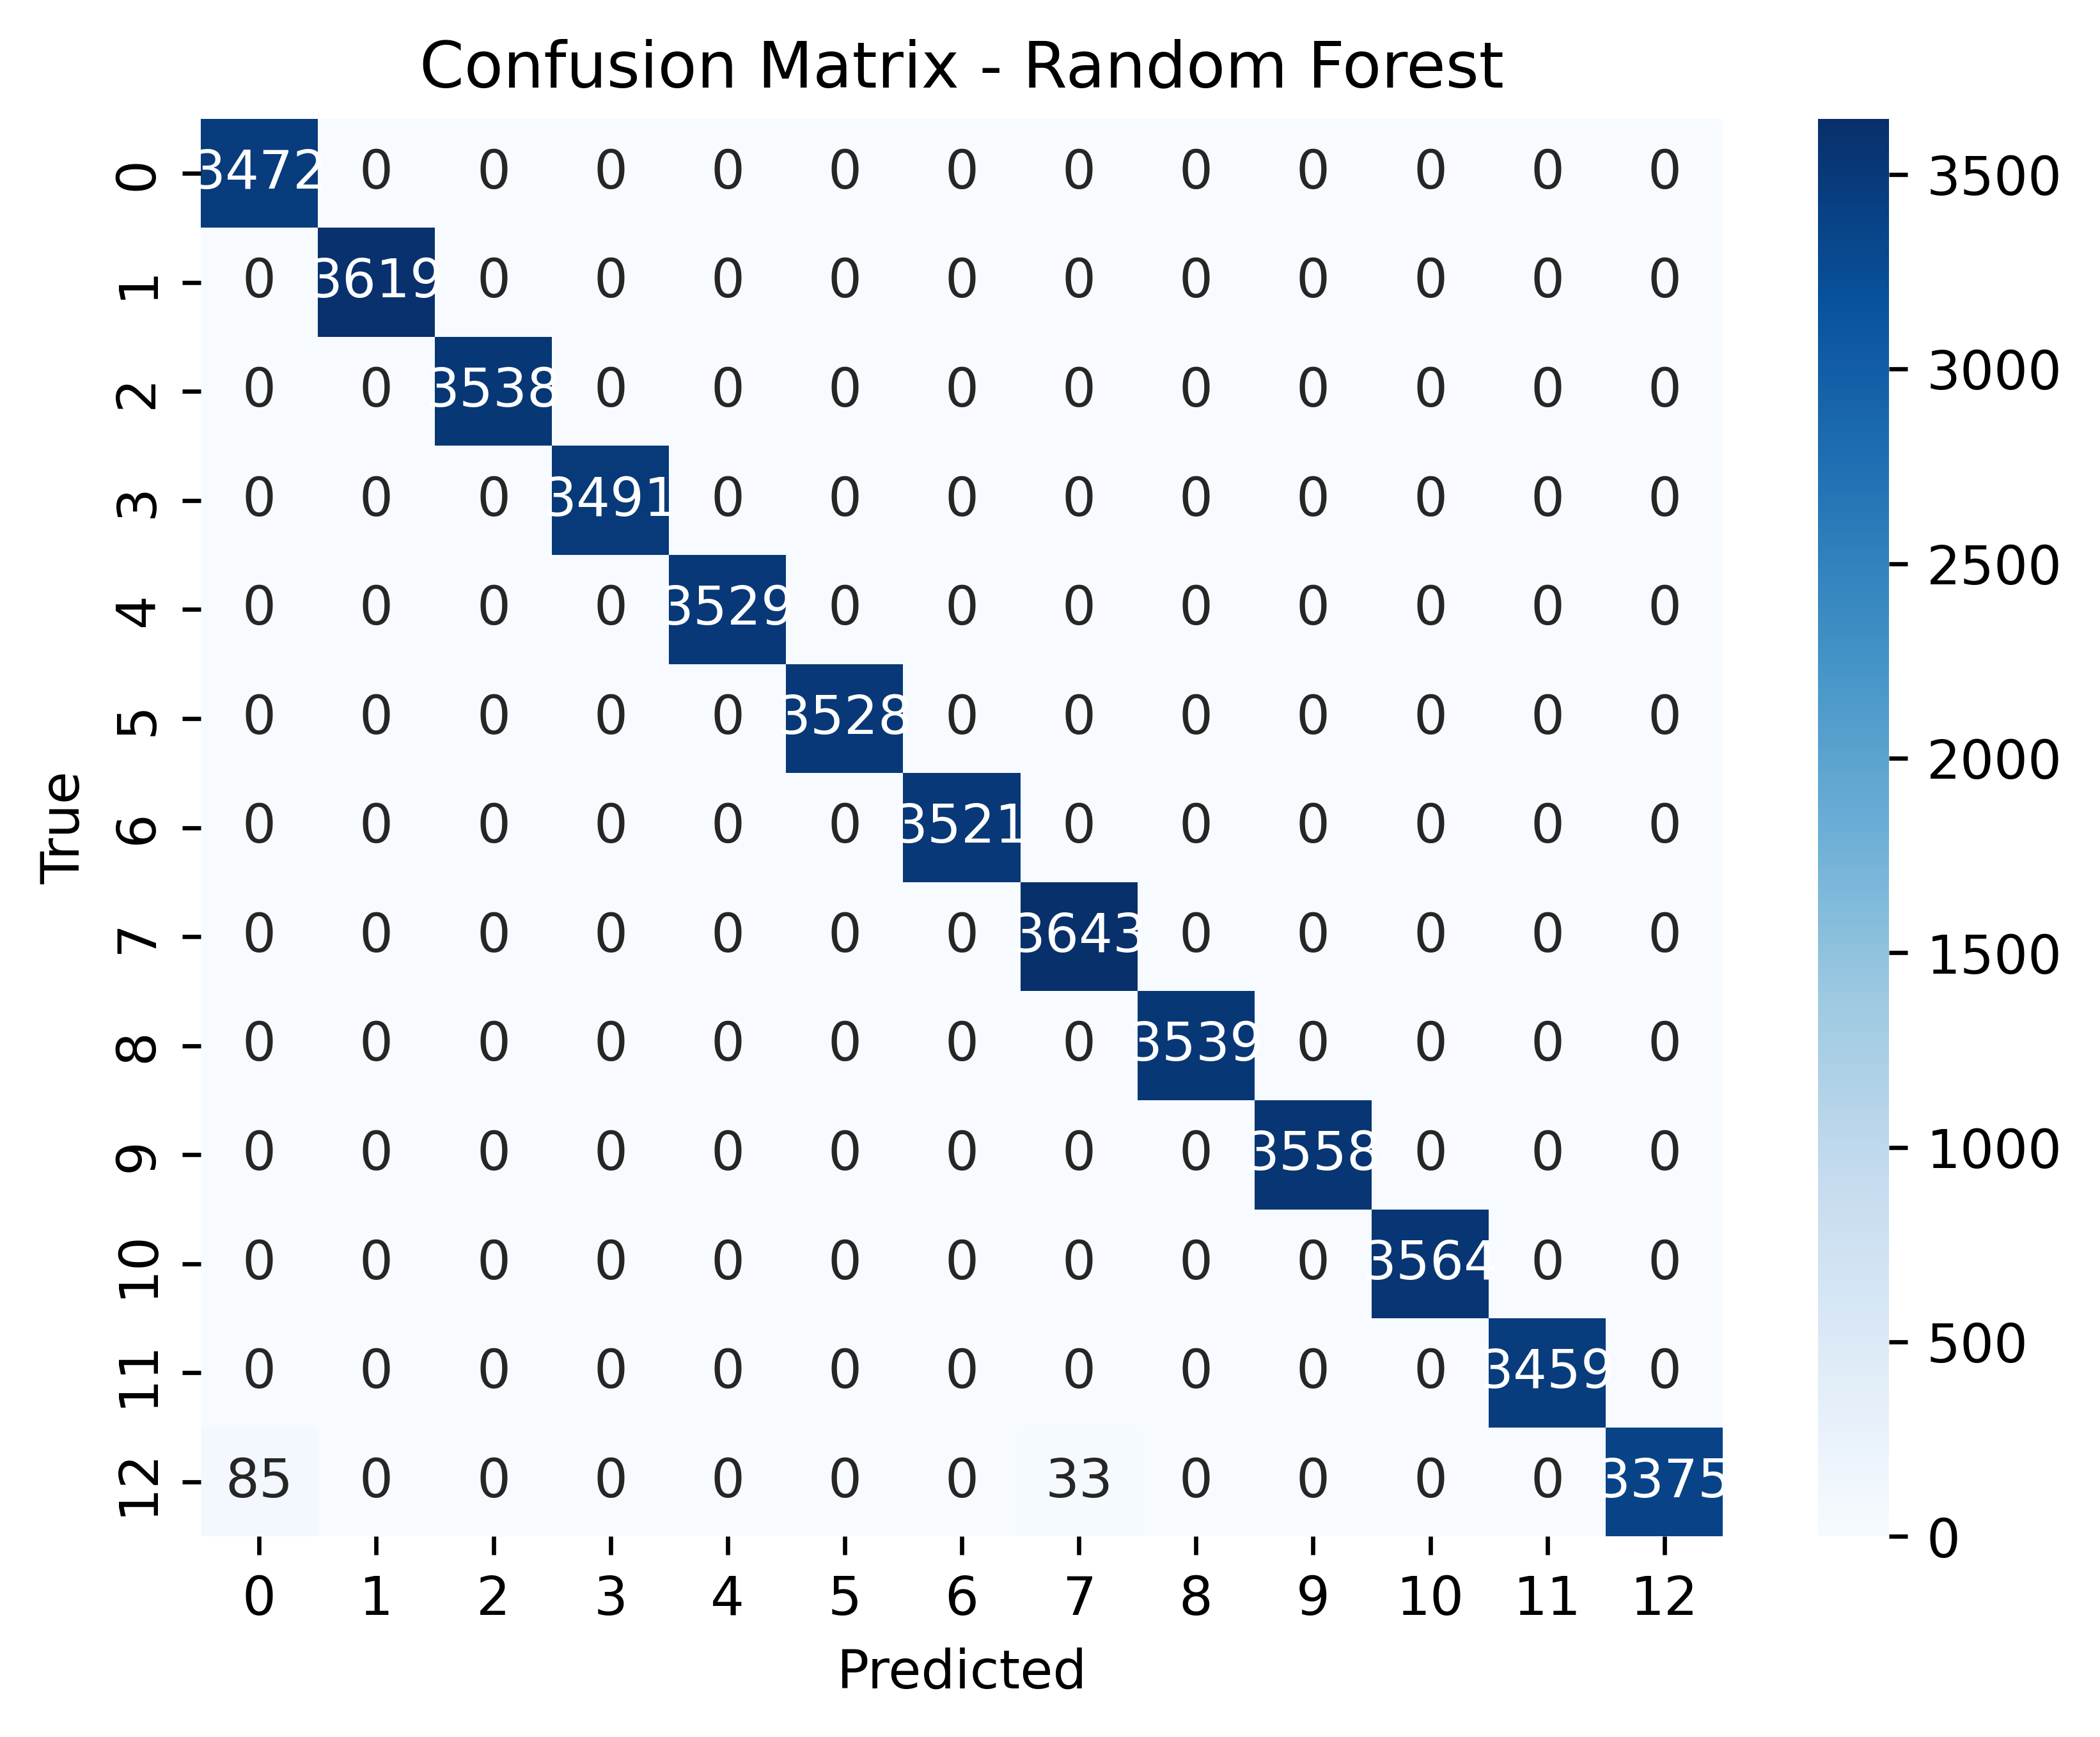

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Step 5: Compute the train accuracy
train_accuracy = rf_model.score(X_train, y_train)

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Display results
print("Accuracy:", accuracy)
print("F1 Score (Weighted):", f1)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("Cross-validation Accuracy (5-fold):", cv_score.mean())
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 9: Optionally, plot the confusion matrix (600 DPI)
plt.figure(dpi=600)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.savefig("confusion_matrix_rf_600dpi.png", dpi=600, bbox_inches="tight")
plt.show()

Accuracy (Gradient Boosting): 0.9581320450885669
F1 Score (Weighted): 0.9574348591972609
Precision (Weighted): 0.957496866743985
Recall (Weighted): 0.9581320450885669
Cross-validation Accuracy (5-fold): 0.9583679179295874

Confusion Matrix (Gradient Boosting):
[[3089    0    0    0    0   16    0  230   15    0   29    0   93]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [ 187    0    0    0    0   31    0 3011   15    0   43    0  356]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564   

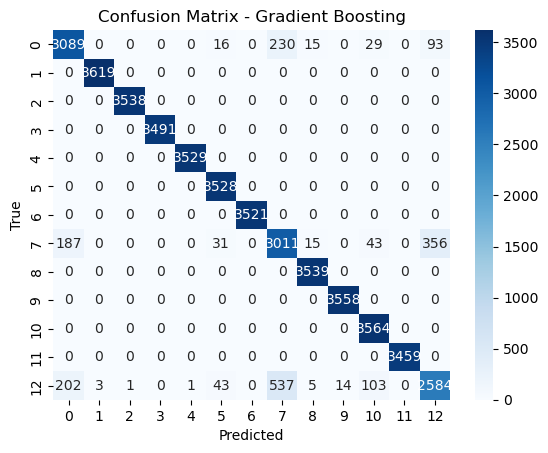

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')

# Cross-validation score
cv_score_gbc = cross_val_score(gbc_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display results
print("Accuracy (Gradient Boosting):", accuracy_gbc)
print("F1 Score (Weighted):", f1_gbc)
print("Precision (Weighted):", precision_gbc)
print("Recall (Weighted):", recall_gbc)
print("Cross-validation Accuracy (5-fold):", cv_score_gbc.mean())
print("\nConfusion Matrix (Gradient Boosting):")
print(conf_matrix_gbc)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

SVM Model Performance:
Accuracy: 0.9046002524263393
F1 Score (Weighted): 0.9018596366164277
Precision (Weighted): 0.9034629709020445
Recall (Weighted): 0.9046002524263393
Cross-validation Accuracy (5-fold): 0.8994917230123572

Confusion Matrix (SVM):
[[2723    0   69    0    0   22    6  250  225    5  111    0   61]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3386    0    0    0    0    0    0  142]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [ 234    0    0    0    0  242    0 2691   14    0  188    0  274]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [  62    0    0    0    0  272    0  432    0    0 2608    0  190]
 

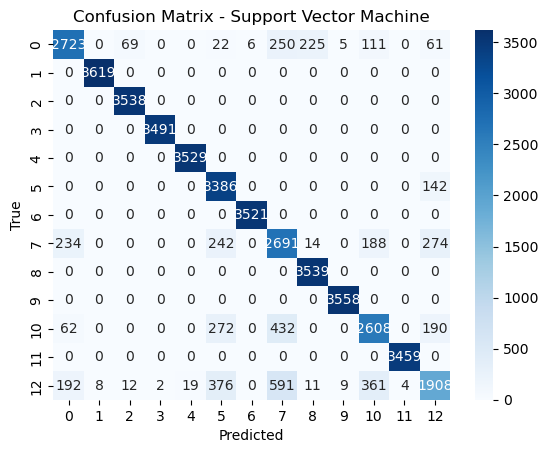

In [23]:
# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Cross-validation score (5-fold cross-validation)
cv_score_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Step 5: Display Results
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:}")
print(f"F1 Score (Weighted): {f1_svm:}")
print(f"Precision (Weighted): {precision_svm:}")
print(f"Recall (Weighted): {recall_svm:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_svm.mean():}")

# Step 6: Display Confusion Matrix
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

KNN Model Performance:
Accuracy: 0.9868999434216825
F1 Score (Weighted): 0.9865082380948771
Precision (Weighted): 0.9877677597955467
Recall (Weighted): 0.9868999434216825
Cross-validation Accuracy (5-fold): 0.985889484728375

Confusion Matrix (KNN):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564    0    0]
 [

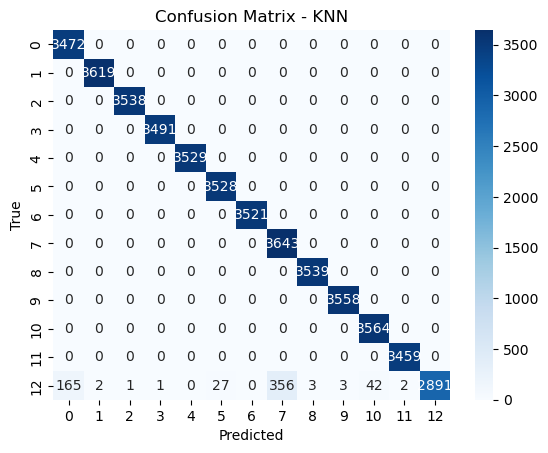

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Step 2: Train the model on the training set
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Step 7: Display results
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_knn:}")
print(f"F1 Score (Weighted): {f1_knn:}")
print(f"Precision (Weighted): {precision_knn:}")
print(f"Recall (Weighted): {recall_knn:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_knn.mean():}")

# Step 8: Confusion Matrix for the KNN model
print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()

Decision Tree Model Performance:
Accuracy: 0.9936240588414501
F1 Score (Weighted): 0.9935355989839793
Precision (Weighted): 0.9938248931787921
Recall (Weighted): 0.9936240588414501
Cross-validation Accuracy (5-fold): 0.9927349032408486

Confusion Matrix (Decision Tree):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0   

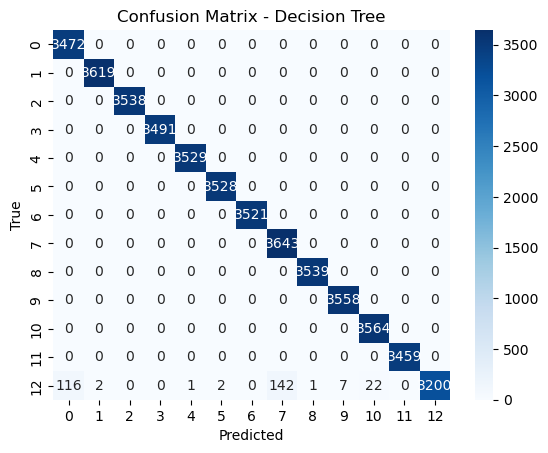

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Step 7: Display results
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:}")
print(f"F1 Score (Weighted): {f1_dt:}")
print(f"Precision (Weighted): {precision_dt:}")
print(f"Recall (Weighted): {recall_dt:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_dt.mean():}")

# Step 8: Confusion Matrix for Decision Tree model
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [27]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1171
[LightGBM] [Info] Number of data points in the train set: 107225, number of used features: 8
[LightGBM] [Info] Start training from score -2.557349
[LightGBM] [Info] Start training from score -2.575195
[LightGBM] [Info] Start training from score -2.565322
[LightGBM] [Info] Start training from score -2.559638
[LightGBM] [Info] Start training from score -2.564231
[LightGBM] [Info] Start training from score -2.564110
[LightGBM] [Info] Start training from score -2.563263
[LightGBM] [Info] Start training from score -2.578139
[LightGBM] [Info] Start training from score -2.565444
[LightGBM] [Info] Start training from score -2.567751
[LightGBM] [Info] Start tra

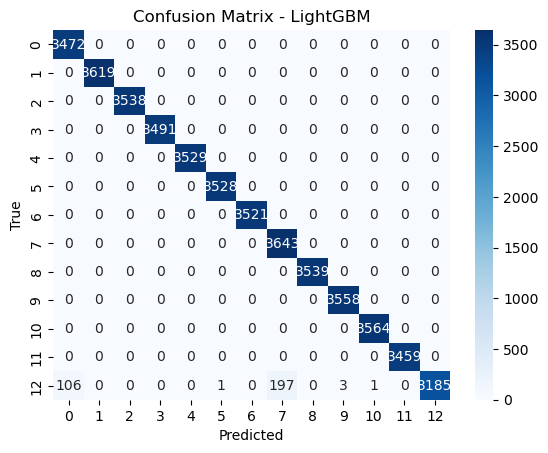

In [28]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 2: Train the model on the training set
lgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Step 7: Display results
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgb:}")
print(f"F1 Score (Weighted): {f1_lgb:}")
print(f"Precision (Weighted): {precision_lgb:}")
print(f"Recall (Weighted): {recall_lgb:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lgb.mean():}")

# Step 8: Confusion Matrix for LightGBM model
print("\nConfusion Matrix (LightGBM):")
print(conf_matrix_lgb)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LightGBM')
plt.show()

Voting Classifier Model Performance:
Accuracy: 0.9273839056447752
F1 Score (Weighted): 0.9256723030351707
Precision (Weighted): 0.9286327614347057
Recall (Weighted): 0.9273839056447752
Cross-validation Accuracy (5-fold): 0.9230216833760784

Confusion Matrix (Voting Classifier):
[[3045    0   37    0    0    9    6  138  191    5    6    0   35]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3386    0    0    0    0    0    0  142]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [ 235   46   23    0   17  296    0 2842   14    0   13    0  157]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [  62    0    0    0    0  201    0  359

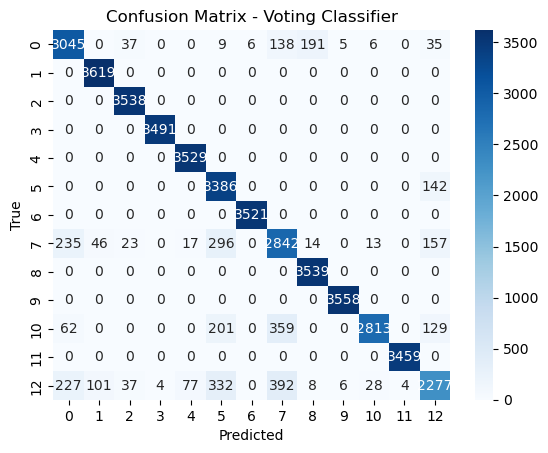

In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize individual base models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Create a Voting Classifier with the base models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_model),
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')  # 'hard' voting means the final prediction is the class with the majority vote

# Step 3: Train the Voting Classifier on the training set
voting_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score_voting = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Step 8: Display results
print("Voting Classifier Model Performance:")
print(f"Accuracy: {accuracy_voting:}")
print(f"F1 Score (Weighted): {f1_voting:}")
print(f"Precision (Weighted): {precision_voting:}")
print(f"Recall (Weighted): {recall_voting:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_voting.mean():}")

# Step 9: Confusion Matrix for Voting Classifier model
print("\nConfusion Matrix (Voting Classifier):")
print(conf_matrix_voting)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

MLP Classifier (Neural Network) Model Performance:
Accuracy: 0.9515820167994081
F1 Score (Weighted): 0.9508662813870691
Precision (Weighted): 0.9520849449892683
Recall (Weighted): 0.9515820167994081
Cross-validation Accuracy (5-fold): 0.9462345535089763

Confusion Matrix (MLP Classifier):
[[3111    0    0    0    0    6    0  243   10    0   22    0   80]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [ 239    0    0    0    0   28    0 3016    0    0   48    0  312]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    

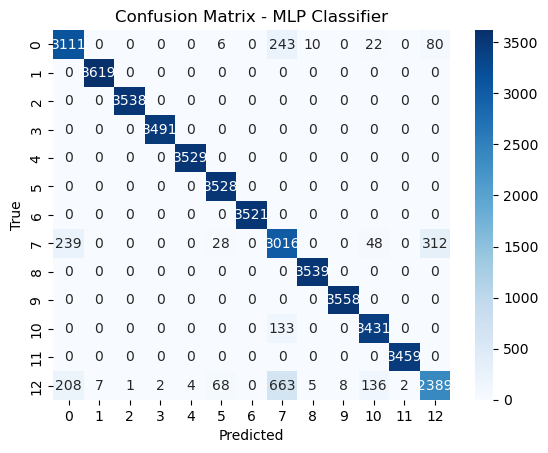

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the MLP Classifier (Neural Network)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Step 2: Train the model on the training set
mlp_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Step 7: Display results
print("MLP Classifier (Neural Network) Model Performance:")
print(f"Accuracy: {accuracy_mlp:}")
print(f"F1 Score (Weighted): {f1_mlp:}")
print(f"Precision (Weighted): {precision_mlp:}")
print(f"Recall (Weighted): {recall_mlp:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_mlp.mean():}")

# Step 8: Confusion Matrix for MLP model
print("\nConfusion Matrix (MLP Classifier):")
print(conf_matrix_mlp)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()